#Convolution Neural Network Model

This project aims to buiid a neural network classification model tha predits images of clothing.

We will use Keras API to build and train the model in Tensorflow.

In [12]:
#importing prerequisites

#TensorFlow and tf.keras
import tensorflow as tf

#Importing pandas for data manipulation
import pandas as pd

#Importing numpy for scientific computations
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

print('TensorFlow version:',tf.__version__)


TensorFlow version: 2.8.0


##Importing Data

We shall use the Fashion MNIST dataset that contains 70,000 greycale images in 10 categries.

In [7]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Loading the dataset returns four Numpy arrays

* The `train_images` and `train_labels` arrays are the *training set*-the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and 'test_labels' arrays.

The images are 28x28 NumPy arrays, with the pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the class *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:


In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

##Exploring the data

In [8]:
train_images.shape

(60000, 28, 28)

There are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

In [9]:
len(train_labels)

60000

There are 60,000 labels in the training set

In [13]:
test_images.shape

(10000, 28, 28)

There are 10000 images in the test set represented by 28 x 28 pixels.

In [14]:
len(test_labels)

10000

The test set contains 10000 image labels

##Data preprocessing

The images in the training set contains pixel values ranging from 0 to 255 as seen in a sample image below.

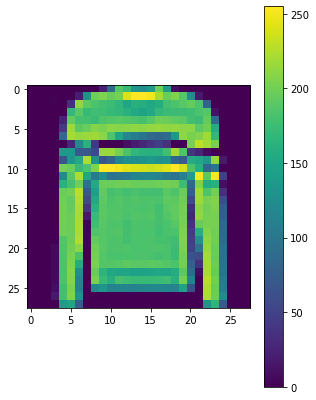

In [17]:
plt.figure(figsize=(5,7))
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model.
#To do so, divide the values by 255.
#It's important that the training set and the testing set be preprocessed in the same way.

train_images = train_images / 255.0
test_images = test_images / 255.0



Let's verify the data is in the correct format by displaying the first 20 images from the training set and display the class name below each image

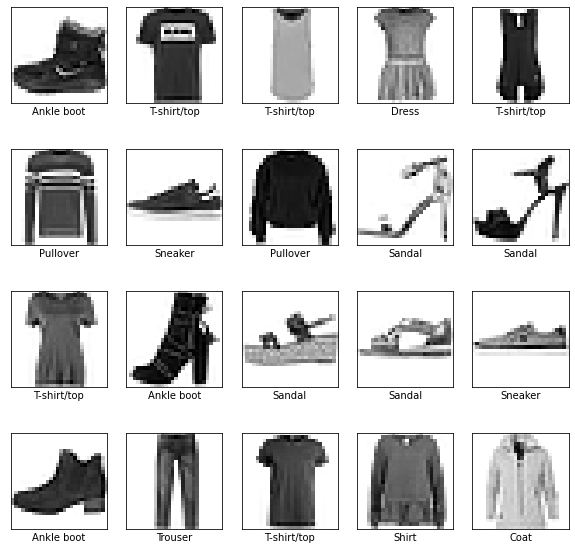

In [23]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]]) #we had defined class_names earlier ( a list of label names)
plt.show()

##Building the model

We will need to configure the layers and then compile the model

###Setting up layers

In [24]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(10)
])

###Compiling the model

In [25]:
model.compile(optimizer='adam' ,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

##Training the model

###Fitting the model

In [26]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4962 - accuracy: 0.8261
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3724 - accuracy: 0.8663
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3332 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3099 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2946 - accuracy: 0.8919
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2790 - accuracy: 0.8973
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2671 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2561 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2486 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

The model has an accuracy of 91%(0.9112) on the training set as seen in the last epoch (10/10)

###Testing and evaluating the model

In [29]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3374 - accuracy: 0.8810 - 289ms/epoch - 924us/step

Test accuracy: 0.8809999823570251


The model has an accuracy of 88% on test. This is a bit lower as compared to training accuracy. It moslty happens due to overfitting.

###Making predictions

In [30]:
#Let's make predicitons on some images
#We shall attach a softmax layer to convert the models liner output -logits- to probabilities which is easier to interpret

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [31]:
#Performing predictions
predictions = probability_model.predict(test_images)

In [38]:
#Let's take a look at the first prediction
predictions[0]

array([6.1839410e-06, 8.0228983e-07, 9.1323791e-08, 4.4556775e-11,
       3.3987548e-09, 4.4233091e-03, 3.6577156e-08, 2.0627115e-02,
       2.2550515e-07, 9.7494227e-01], dtype=float32)

In [37]:
#A prediction is an array of 10 numbers. 
#They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing
#represented by their indexes 

#You can see which label has the highest confidence value.
np.argmax(predictions[0])

9

The model is confident that the image is an ankle boot ( `class_names[9]` )

In [39]:
#Let's confirm with the first element in the test labels

test_labels[0]

9

Let's visualize the full set of 10 class predictions

In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)
  
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

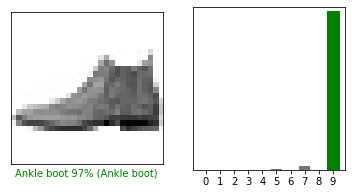

In [49]:
#Let's look at the 0th image, predictions, and prediction array. 
#Correct prediction labels are blue and incorrect prediction labels are red. 
#The number gives the percentage (out of 100) for the predicted label.

i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

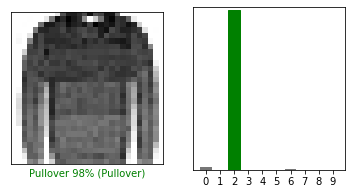

In [56]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

##Using the trained model

In [63]:
#Let's use the trained model to make a prediction on a single image
#grab an image from the test dataset

img = test_images[3]

print(img.shape)

(28, 28)


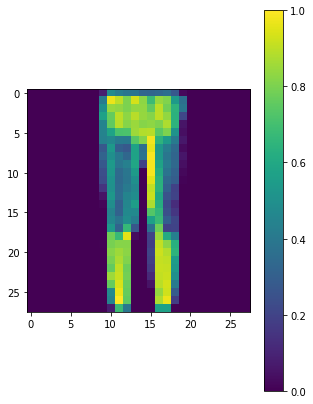

In [64]:
#Visualizing the image

plt.figure(figsize=(5,7))
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [65]:
#Keras can only make preditions to a batch or a collection at once.
#We'll need to add our image to a list where its the only element

img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Let's now use the model to predict the image

In [66]:
single_prediction = probability_model.predict(img)
print(single_prediction)

[[3.9076690e-07 9.9999905e-01 1.8166161e-09 6.3635065e-07 1.6582997e-09
  4.9945526e-15 3.0565268e-09 7.0552361e-20 1.5520419e-13 2.1259660e-14]]


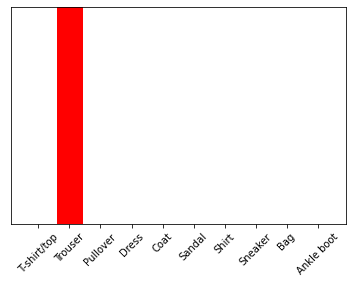

In [67]:
plot_value_array(1, single_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [69]:
np.argmax(single_prediction[0])

1

The model predicted the image is a *Trouser* as expected (`class_names[1]`)